In [5]:
import sys
sys.path.append("/home/edo/Software/TESI/AstroCosmoComputational/Students/Martinelli_Edoardo/")

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",})

# Import pyACC logger
from pyACC.helpers import Logger

# Set the logger
print = Logger("IMF computation")

# Import your integration methods
from pyACC.Calculus import integrate_f

# Initial Mass function

In this exercise we will play with the Initial Mass function (IMF).

The IMF is a key concept in stellar populations. It the defines how star mass is distributed 
in a single formation event of a stellar population (SSP). 

This quantity is at the core of many astrophysical studies, from star clusters (open/globular)
to galaxies, and it's fundamental to explain observational properties of the object in study.

You will find different assumptions for this distribution in literature. 
The more traditional is a power-law (Salpeter 1955):

$$ \xi(M) = \xi_0 M^{-\alpha}; $$

where M is the mass in solar masses unit, $\xi_0$ is a normalisation 
constant and $\alpha$ is power-law exponent A common assumption is $\alpha=2.35$.
Other, more recent definitions for the IMF are Kroupa (2002) (double power-law) and Chabrier (2003)

Starting from the IMF, we will compute some key quantities of the stellar population.

In [6]:
# Let's define the python function for the IMF
def get_IMF(M, alpha, xi_0):
    """
    Generic function for the IMF

    Parameters
    ----------

    M : float
        Mass of the star
    alpha : float
        Power of the IMF
    xi_0 : float    
        Normalization factor
    
    Returns
    -------
    IMF : float
        The value of the IMF at mass M
    """

    # Implement the Salpeter IMF
    return xi_0 * M**(-alpha)

---
-->  2024-03-06 11:25:28.805487
---
I'm integrating over a function, I used the quad method from scipy.
2024-03-06 11:25:28.805899 :: IMF computation  :: Normalization is: xi_0= 0.0001043665095820665


Text(0, 0.5, '$\\xi(M)$')

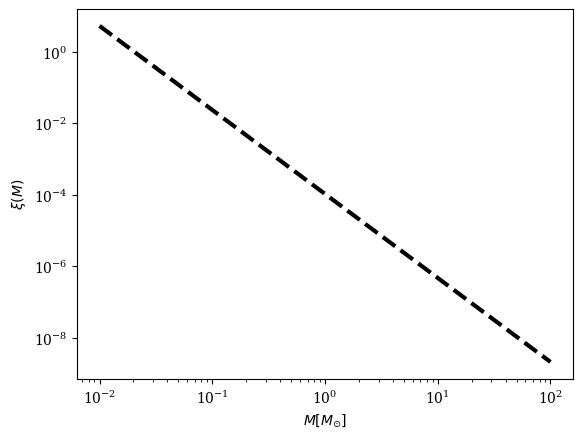

In [7]:
# Minimum and maximum mass size in solar masses unit
mass_min = 1e-2
mass_max = 1e2

# Power of the IMF
alpha = 2.35

# Create the mass vector
mass = np.logspace(np.log10(mass_min), np.log10(mass_max), 100)


# Normalisation of the IMF


#  ? IS THIS A RIGHT METHOD TO NORMALIZE THE IMF ?
norm_func = lambda M: get_IMF(M, alpha, 1)
xi_0 = 1/(integrate_f(norm_func, 9*1e-4,1e3)[0])

'''
mass_norm =np.logspace(np.log10(1e-2), np.log10(1e2), 10000)
xi_0 = 1/(integrate_f(get_IMF(mass_norm, alpha, 1)))
'''

print("Normalization is: xi_0=",xi_0)




# Plot in log scale
plt.loglog(mass, get_IMF(mass, alpha, xi_0), lw=3, color="k", ls="--")
plt.xlabel(r"$M  [M_{\odot}]$")
plt.ylabel(r"$\xi(M)$")




## Total number of stars

You can obtain the total number of stars by integrating the IMF over the mass range. The total number of stars is given by

$$ N = \int_{M_{\text{min}}}^{M_{\text{max}}} \xi(M) dM. $$

Try to perform this integration.

In [8]:
# Get the total number of stars

# Create the integration object
# Call your integration method to obtain the number of stars
N = integrate_f(get_IMF(mass,alpha,xi_0), mass_min, mass_max)
# Print the result
print(f"The total number of stars is {N:.0f}")

---
-->  2024-03-06 11:25:29.249388
---
I'm integrating over a sample, I used the trapezoid method from scipy.
2024-03-06 11:25:29.249612 :: IMF computation  :: The total number of stars is 24


## Average star mass

The average star mass can be compute quit strightforwardly:

$$ \hat{M} = \frac{\int_{M_{\text{min}}}^{M_{\text{max}}} M\xi(M) dM}{\int_{M_{\text{min}}}^{M_{\text{max}}} \xi(M) dM.}$$

After obtaining this number, what can we conclude?

In [9]:
# Compute the average star mass

M_hat = integrate_f(mass*get_IMF(mass,alpha,xi_0), mass_min, mass_max)/integrate_f(get_IMF(mass,alpha,xi_0), mass_min, mass_max)

print(f"The average star mass is: {M_hat:.2e} solar masses")

---
-->  2024-03-06 11:25:29.274626
---
I'm integrating over a sample, I used the trapezoid method from scipy.
---
-->  2024-03-06 11:25:29.274903
---
I'm integrating over a sample, I used the trapezoid method from scipy.
2024-03-06 11:25:29.275168 :: IMF computation  :: The average star mass is: 1.74e-02 solar masses


In [10]:
def get_star_luminosity(M):
    """
    Get the star luminosity using the mass-luminosity
    relation

    Parameters
    ----------
    M : float
        Mass of the star
    
    Returns
    -------
    L : float
        Luminosity of the star
    """
    if M < 0.43:
        L = 0.23 * M**2.3
    elif 0.43 < M < 2:
        L = M**4
    elif 2 < M < 20:
        L = 1.5 * M**3.5
    elif M > 20:
        L = 3200 * M
    
    return L

In [11]:
# Compute average luminosity

#Lfunc=lambda M: get_star_luminosity(M)*get_IMF(M,alpha,xi_0)
L = np.zeros(mass.size)
for i,mi in enumerate (mass):
    L[i]=get_star_luminosity(mi)

L_hat = integrate_f(L*get_IMF(mass,alpha,xi_0), mass_min, mass_max)/integrate_f(get_IMF(mass,alpha,xi_0), mass_min, mass_max)

print(f"The average star luminosity is: {L_hat:.2e} solar luminosity")

---
-->  2024-03-06 11:25:29.325401
---
I'm integrating over a sample, I used the trapezoid method from scipy.
---
-->  2024-03-06 11:25:29.325584
---
I'm integrating over a sample, I used the trapezoid method from scipy.
2024-03-06 11:25:29.325733 :: IMF computation  :: The average star luminosity is: 3.63e-03 solar luminosity


Text(0, 0.5, '$L(M) [L_{\\odot}]$')

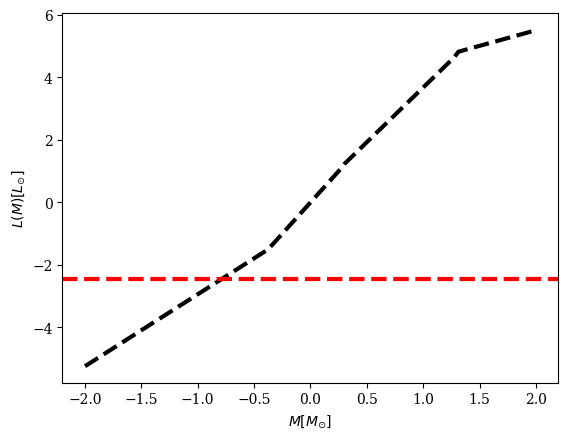

In [12]:
# Plot luminosity

plt.plot(np.log10(mass), np.log10([get_star_luminosity(m) for m in mass]), lw=3, color="k", ls="--")
plt.axhline(np.log10(L_hat), color="r", lw=3, ls="--", label="Average luminosity")
plt.xlabel(r"$M  [M_{\odot}]$")
plt.ylabel(r"$L(M) [L_{\odot}]$")
